In [ ]:
Datset on 2 language with translation

In [ ]:
Maximum size in both languages and fix the input and output size

seq -> when a sentence starts and when a sentence end
fixed input  - 10
fixed output - 5

In [ ]:
Pre processing -

In [ ]:
Padding - > 0 0 0 0

In [ ]:
Seq2Seq

Encoder and Decoder

Encoder takes the input
decoder gives the output

Encoder Group of LSTM - output

Input to the decoder - Decoder predicts the output - till you get end sequence


Input is a sequence of word -> embedding  - 10
LSTM
repeatvector
LSTM
Dense number neuron 5



# Language Translation with Word Level seq2seq DL Models

The objective is to convert a German sentence (sequence of words) to English using a Neural Machine Translation (NMT) system based on word level encoder-decoder models.

![](https://i.imgur.com/So32H7U.png)

We will use German-English sentence pairs data from http://www.manythings.org/anki/


Sequence-to-Sequence (seq2seq) models are used for a variety of NLP tasks, such as text summarization, speech recognition, language translation, text-to-speech, speech-to-text among others. Our aim is to translate german to english sentences.

Here, both, the input and output are sentences. In other words, these sentences are a sequence of words going in and out of our model.

![](https://i.imgur.com/Uk1tCPo.png)

A typical seq2seq model is also known as an encoder-decoder model and has 2 major components:
- The encoder
- The decoder

Both these parts are essentially two different sequential models like RNNs\LSTMs which are combined together.

![](https://i.imgur.com/bT6PAtv.png)

# Download the Dataset

In [ ]:
!wget http://www.manythings.org/anki/deu-eng.zip
!unzip deu-eng.zip
!ls -l

--2024-04-21 04:07:37--  http://www.manythings.org/anki/deu-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10364105 (9.9M) [application/zip]
Saving to: ‘deu-eng.zip’

deu-eng.zip         100%[===================>]   9.88M  --.-KB/s    in 0.06s   

2024-04-21 04:07:37 (161 MB/s) - ‘deu-eng.zip’ saved [10364105/10364105]

Archive:  deu-eng.zip
  inflating: deu.txt                 
  inflating: _about.txt              
total 52400
-rw-r--r-- 1 root root     1441 Apr  1 23:40 _about.txt
-rw-r--r-- 1 root root 10364105 Apr  2 02:28 deu-eng.zip
-rw-r--r-- 1 root root 43280227 Apr  1 23:40 deu.txt
drwxr-xr-x 1 root root     4096 Apr 18 13:25 sample_data


In [ ]:
!pip install tqdm

# Load up the dataset

In [ ]:
import numpy as np

FILE_NAME = './deu.txt'
with open(FILE_NAME, mode='rt', encoding='utf-8') as infile:
  data = infile.read()
  sentences = data.strip().split('\n')
  sentences = [item.split('\t') for item in sentences]
  eng_deu = np.array(sentences)

eng_deu = eng_deu[:10000]
eng_deu;

In [ ]:
deu = eng_deu[:,1]
eng = eng_deu[:,0]
eng, deu

(array(['Go.', 'Hi.', 'Hi.', ..., "I'm devastated.", "I'm diplomatic.",
        "I'm doing fine."], dtype='<U537'),
 array(['Geh.', 'Hallo!', 'Grüß Gott!', ..., 'Ich bin am Boden zerstört.',
        'Ich bin diplomatisch.', "Mir geht's gut."], dtype='<U537'))

# Basic Text Pre-processing

In [ ]:
import string

# Remove punctuation and lowercase
eng = np.array([s.translate(str.maketrans('', '', string.punctuation)).lower() for s in eng])
deu = np.array([s.translate(str.maketrans('', '', string.punctuation)).lower() for s in deu])
eng, deu

(array(['go', 'hi', 'hi', ..., 'im devastated', 'im diplomatic',
        'im doing fine'], dtype='<U14'),
 array(['geh', 'hallo', 'grüß gott', ..., 'ich bin am boden zerstört',
        'ich bin diplomatisch', 'mir gehts gut'], dtype='<U48'))

# Viewing Sentence Lengths

In [ ]:
eng_len = [len(s.split()) for s in eng]
deu_len = [len(s.split()) for s in deu]

max(eng_len), max(deu_len)

(5, 8)

array([[<Axes: title={'center': 'eng'}>, <Axes: title={'center': 'deu'}>]],
      dtype=object)

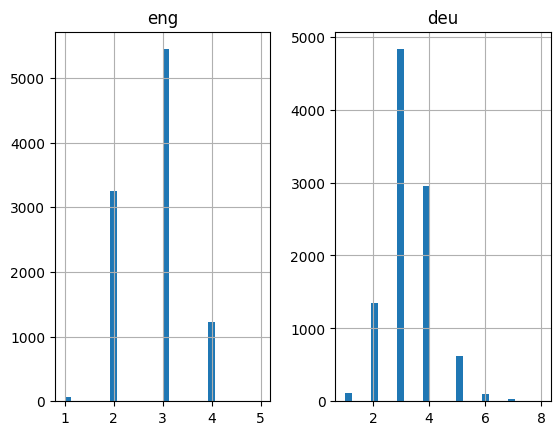

In [ ]:
import pandas as pd
%matplotlib inline

length_df = pd.DataFrame({'eng':eng_len, 'deu':deu_len})
length_df.hist(bins=30)

# Converting Text to Sequences of Numbers

In [ ]:
from tensorflow import keras

eng_tokenizer = keras.preprocessing.text.Tokenizer()
eng_tokenizer.fit_on_texts(eng)
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max(eng_len)
print('Max eng text length:', eng_length)
print('English Vocabulary Size:', eng_vocab_size)

Max eng text length: 5
English Vocabulary Size: 2190


In [ ]:
deu_tokenizer = keras.preprocessing.text.Tokenizer()
deu_tokenizer.fit_on_texts(deu)
deu_vocab_size = len(deu_tokenizer.word_index) + 1
deu_length = max(deu_len)
print('Max deu text length:', deu_length)
print('German Vocabulary Size:', deu_vocab_size)

Max deu text length: 8
German Vocabulary Size: 3637


In [ ]:
eng_tokenizer

In [ ]:
from sklearn.model_selection import train_test_split

train_deu, test_deu, train_eng, test_eng = train_test_split(deu, eng, test_size=0.2, random_state = 42)
train_deu.shape, test_deu.shape, train_eng.shape, test_eng.shape

((8000,), (2000,), (8000,), (2000,))

In [ ]:
train_deu, train_eng

(array(['er ist ein tier', 'ich hoffe das ist nicht der fall',
        'ich bin ein dichter', ..., 'tom war arm', 'ich habe ihn gesehen',
        'lass mich ausreden'], dtype='<U48'),
 array(['hes an animal', 'i hope not', 'im a poet', ..., 'tom was poor',
        'i saw him', 'let me finish'], dtype='<U14'))

### We pad the sequences of texts also to make sure they are of uniform length

In [ ]:
train_deu

array(['er ist ein tier', 'ich hoffe das ist nicht der fall',
       'ich bin ein dichter', ..., 'tom war arm', 'ich habe ihn gesehen',
       'lass mich ausreden'], dtype='<U48')

In [ ]:
keras.preprocessing.sequence.pad_sequences(deu_tokenizer.texts_to_sequences(train_deu), maxlen=deu_length, padding='post')[0]

array([  11,    3,   16, 3426,    0,    0,    0,    0], dtype=int32)

In [ ]:
train_deu_enc = deu_tokenizer.texts_to_sequences(train_deu)
train_deu_enc = keras.preprocessing.sequence.pad_sequences(train_deu_enc, maxlen=deu_length, padding='post')

train_eng_enc = eng_tokenizer.texts_to_sequences(train_eng)
train_eng_enc = keras.preprocessing.sequence.pad_sequences(train_eng_enc, maxlen=eng_length, padding='post')

train_deu_enc.shape, train_eng_enc.shape

((8000, 8), (8000, 5))

In [ ]:
test_deu_enc = deu_tokenizer.texts_to_sequences(test_deu)
test_deu_enc = keras.preprocessing.sequence.pad_sequences(test_deu_enc, maxlen=deu_length, padding='post')

test_eng_enc = eng_tokenizer.texts_to_sequences(test_eng)
test_eng_enc = keras.preprocessing.sequence.pad_sequences(test_eng_enc, maxlen=eng_length, padding='post')

test_deu_enc.shape, test_eng_enc.shape

((2000, 8), (2000, 5))

# Build seq2seq Model Architecture

![](https://i.imgur.com/3ZVi97s.png)

- For the encoder, we will use an embedding layer and an LSTM layer
- For the decoder, we will use another LSTM layer followed by a dense layer
- Repeat Vector helps pass the output sequence from encoder to all LSTM cells in the decoder

We leverage the full power of GPUs by using the CUDA variant of the LSTM models.

In [ ]:
EMBEDDING_DIM = 512
LSTM_UNITS = 512

encoder_inputs = keras.layers.Input(shape=(deu_length,))
enc_emb =  keras.layers.Embedding(deu_vocab_size, EMBEDDING_DIM)(encoder_inputs)
encoder_lstm = keras.layers.LSTM(LSTM_UNITS)(enc_emb)
rp_vec = keras.layers.RepeatVector(eng_length)(encoder_lstm)

decoder_lstm = keras.layers.LSTM(LSTM_UNITS, return_sequences=True)(rp_vec)
decoder_softmax = keras.layers.Dense(eng_vocab_size, activation='softmax')(decoder_lstm)
model = keras.models.Model(inputs=encoder_inputs, outputs=decoder_softmax)

model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001), loss='sparse_categorical_crossentropy')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 embedding (Embedding)       (None, 8, 512)            1862144   
                                                                 
 lstm (LSTM)                 (None, 512)               2099200   
                                                                 
 repeat_vector (RepeatVecto  (None, 5, 512)            0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 5, 512)            2099200   
                                                                 
 dense (Dense)               (None, 5, 2190)           1123470   
                                                             

# Model Training

We save the model with minimum loss here also with checkpointing

In [ ]:
mc = keras.callbacks.ModelCheckpoint('my_nmt_model_min_loss.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history = model.fit(train_deu_enc, train_eng_enc.reshape(train_eng_enc.shape[0], train_eng_enc.shape[1], 1),
          epochs=10, batch_size=512,
          validation_split = 0.1,
          callbacks=[mc], verbose=1)

Epoch 1/10
15/15 [==============================] - ETA: 0s - loss: 3.7158
Epoch 1: val_loss improved from inf to 3.66487, saving model to my_nmt_model_min_loss.h5
15/15 [==============================] - 42s 3s/step - loss: 3.7158 - val_loss: 3.6649
Epoch 2/10
15/15 [==============================] - ETA: 0s - loss: 3.4566
Epoch 2: val_loss improved from 3.66487 to 3.43530, saving model to my_nmt_model_min_loss.h5
15/15 [==============================] - 38s 3s/step - loss: 3.4566 - val_loss: 3.4353
Epoch 3/10
15/15 [==============================] - ETA: 0s - loss: 3.3344
Epoch 3: val_loss did not improve from 3.43530
15/15 [==============================] - 36s 2s/step - loss: 3.3344 - val_loss: 3.4434
Epoch 4/10
15/15 [==============================] - ETA: 0s - loss: 3.2758
Epoch 4: val_loss improved from 3.43530 to 3.31640, saving model to my_nmt_model_min_loss.h5
15/15 [==============================] - 39s 2s/step - loss: 3.2758 - val_loss: 3.3164
Epoch 5/10
15/15 [============

### We also save the final model to check it's performance

In [ ]:
model.save('my_nmt_model.h5')

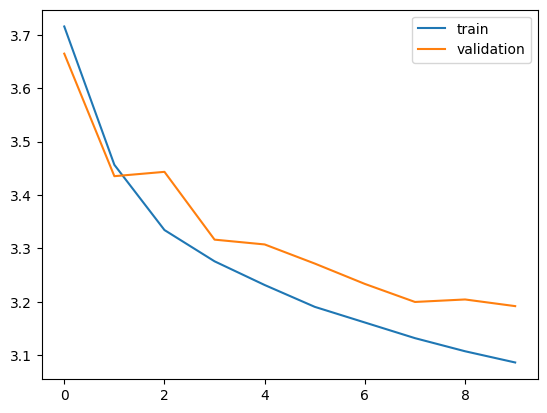

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])

# Text Generator

We build a utility function to generate text sequences based on the output prediction sequences

In [ ]:
from tqdm import tqdm
pd.set_option('display.max_colwidth', 500)

eng_idx2word = {v:k for k, v in eng_tokenizer.word_index.items()}

def generate_prediction_texts(pred_seqs, idx2word_map):
  pred_texts = []

  for pred in tqdm(preds):
    temp = []
    for idx in range(len(pred)):
      w = eng_idx2word.get(pred[idx], None)
      if idx > 0:
        if (w == eng_idx2word.get(pred[idx-1], None)) or (w == None):
            temp.append('')
        else:
            temp.append(w)

      else:
        if(w == None):
            temp.append('')
        else:
            temp.append(w)

    pred_texts.append(' '.join(temp))
  return pred_texts


# Perform Language Translation with Trained Models

In [ ]:
from tensorflow import keras
final_model = keras.models.load_model('./my_nmt_model.h5')
min_loss_model = keras.models.load_model('./my_nmt_model_min_loss.h5')

In [ ]:
train_deu_enc.shape

(8000, 8)

# Translation on Train Data

### Performance of Final Model on Train Data

In [ ]:
model = final_model
pred_probs = model.predict(train_deu_enc.reshape((train_deu_enc.shape[0], train_deu_enc.shape[1])), verbose=1)
preds = [np.argmax(i, axis=1) for i in pred_probs]
# convert predictions into text (English)
pred_texts = generate_prediction_texts(pred_seqs=preds, idx2word_map=eng_idx2word)
pred_df = pd.DataFrame({'source': train_deu, 'target' : train_eng, 'predicted' : pred_texts})

250/250 [==============================] - 22s 85ms/step


In [ ]:
preds = [np.argmax(i, axis=1) for i in pred_probs]
# convert predictions into text (English)
pred_texts = generate_prediction_texts(pred_seqs=preds, idx2word_map=eng_idx2word)
pred_df = pd.DataFrame({'source': train_deu, 'target' : train_eng, 'predicted' : pred_texts})

100%|██████████| 8000/8000 [00:00<00:00, 252019.89it/s]


In [ ]:
pred_df.head(50).T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
source,er ist ein tier,ich hoffe das ist nicht der fall,ich bin ein dichter,legen sie mal einen zahn zu,ich will ein bier,katzen sind süß,kommen sie zurück nach hause,tom ist jetzt auf,wir sind uns gerade begegnet,tom tanzte,...,ich werde schon zurechtkommen,sie stinken,ich will geld,ist das eine fledermaus,hat tom geholfen,du bist gefeuert,er hat einen bart,fangen sie an,tom kämpfte,heute ist es kalt
target,hes an animal,i hope not,im a poet,get a move on,i want a beer,cats are cute,come back home,tom is now up,we just met,tom danced,...,ill be fine,you stink,i want money,is that a bat,did tom help,youre fired,he has a beard,get started,tom fought,todays cold
predicted,i was,i was,i was,tom is,i was,tom is,tom is,i is,tom is,i is,...,i was,tom is,i was,i is,i is,i is,i was,tom is,i is,tom is


In [ ]:
pred_df.iloc[500:550].T

,500,501,502,503,504,505,506,507,508,509,...,540,541,542,543,544,545,546,547,548,549
source,stellen sie es dahin,ich werde kämpfen,ich bin gehänselt worden,ich möchte popcorn,sie geht zu fuß,ich habe nichts zu essen,das ist keine lüge,tom ist verärgert,tom kann kommen,fantastisch,...,mach dich fort,ich mache mich fertig,er wird kommen,ich bin ein rotschopf,ich liebe schmalzkringel,er braucht es,ich war müde,wer ist als nächstes dran,behalte das,ich brauche eine gehaltserhöhung
target,put it there,i will fight,i was bullied,i want popcorn,she walks,i have no food,thats no lie,tom is angry,tom can come,awesome,...,get lost,ill get ready,he will come,im a redhead,i love donuts,he needs it,i was tired,whos next,keep this,i need a raise
predicted,tom is,i was,i was,i was,tom is,i was,tom is,i is,i was,tom is,...,tom is,i was,i is,i was,i was,i was,i was,tom is,tom is,i was


### Performance of Minimum Loss Model on Train Data

In [ ]:
model = min_loss_model
pred_probs = model.predict(train_deu_enc.reshape((train_deu_enc.shape[0], train_deu_enc.shape[1])), verbose=1)
preds = [np.argmax(i, axis=1) for i in pred_probs]
# convert predictions into text (English)
pred_texts = generate_prediction_texts(pred_seqs=preds, idx2word_map=eng_idx2word)
pred_df = pd.DataFrame({'source': train_deu, 'target' : train_eng, 'predicted' : pred_texts})

250/250 [==============================] - 20s 75ms/step


100%|██████████| 8000/8000 [00:00<00:00, 147776.52it/s]


In [ ]:
pred_df.head(50).T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
source,er ist ein tier,ich hoffe das ist nicht der fall,ich bin ein dichter,legen sie mal einen zahn zu,ich will ein bier,katzen sind süß,kommen sie zurück nach hause,tom ist jetzt auf,wir sind uns gerade begegnet,tom tanzte,...,ich werde schon zurechtkommen,sie stinken,ich will geld,ist das eine fledermaus,hat tom geholfen,du bist gefeuert,er hat einen bart,fangen sie an,tom kämpfte,heute ist es kalt
target,hes an animal,i hope not,im a poet,get a move on,i want a beer,cats are cute,come back home,tom is now up,we just met,tom danced,...,ill be fine,you stink,i want money,is that a bat,did tom help,youre fired,he has a beard,get started,tom fought,todays cold
predicted,i was,i was,i was,tom is,i was,tom is,tom is,i is,tom is,i is,...,i was,tom is,i was,i is,i is,i is,i was,tom is,i is,tom is


In [ ]:
pred_df.iloc[500:550].T

,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549
source,ich habe hausaufgaben,tom ist nicht allzu groß,warum bist du zu hause,ich kann das hier nicht öffnen,tom seufzte,er genas wieder,zeigs mir,sie sind nutzlos,er hat einen hund gemalt,glücklicherweise wurde niemand nass,ich habe tom schreien hören,das wird nicht leicht sein,ich verstehe was ihr sagt,ich legte die handtücher zusammen,das ist eine nette feier,tom war ein bisschen nervös,tom bäckt einen kuchen,spinnen spinnen netze,tom entschied sich,muss ich umsteigen,er bekannte sich schuldig,ist das dein haus,er singt gerne,tom kann gut singen,es war unglaublich,sing nicht,du solltest mir danken,das haus steht in flammen,ich habe ihn für tom geschrieben,tom ist aufmerksam,tom kann nicht schwimmen,ich hatte sowieso keinen hunger,ich werde das vielleicht nicht tun,vergiss mich nicht,kann ich sie sprechen,ich gebe spanischunterricht,ich habe mich an das rezept gehalten,wie heiß ist zu heiß,mach deine arbeit zu ende,suchen sie sich einen sitzplatz,ich werde euch mit freude behilflich sein,was habt ihr sonst noch gekauft,tom verlangte mehr,mir ist übel,du leistest einen beitrag,tom handelt mit rauschgift,warum hast du gelogen,ich habe große angst,tom klang glücklich,sie sind bestürzt
target,i have homework,tom isnt very tall,why are you at home,i cant get this open,tom gave a sigh,he got well again,show me,youre useless,he painted a dog,luckily nobody got wet,i heard tom scream,it wont be easy,i hear you,i folded the towels,its a nice party,tom was a bit nervous,tom is baking a cake,spiders spin webs,tom made up his mind,do i need to transfer,he confessed his guilt,is that your house,he loves singing,tom is a good singer,it was unbelievable,dont sing,you should thank me,the house is on fire,i wrote it for tom,tom is observant,tom cant swim,i wasnt hungry anyway,i may not do that,dont forget about me,may i speak to you,i teach spanish,i followed the recipe,how hot is too hot,finish your work,find yourselves a seat,ill gladly help you,what else did you buy,tom demanded more,i feel like vomiting,youre contributing,tom is dealing drugs,why did you lie,im very scared,tom sounded happy,youre upset
predicted,i have homework,tom isnt very tall,why are you at home,i cant do this open,tom sighed,he got well again,show me,youre useless,he painted a dog,luckily nobody got wet,i heard tom scream,it wont be easy,i what you,i folded the towels,its a nice party,tom was a bit nervous,tom is baking a cake,spiders spin webs,tom gave his,do i need to transfer,he admitted his guilt,is this your house,he likes singing,tom is be at cook,it was unbelievable,dont be,you should thank me,the house is on fire,i wrote it for tom,tom is attentive,tom cant swim,i wasnt hungry,i wont not do that,dont forget about me,can i speak to you,i teach spanish,i followed the recipe,how hot is hot,finish your work to,get a seat,ill gladly you to,what else did you buy,tom demanded more,i feel like vomiting,youre contributing,tom is full drugs,why did you lie,im very scared,tom sounded happy,theyre upset


# Translation on Test Data

### Performance of Final Model on Test Data

In [ ]:
model = final_model
pred_probs = model.predict(test_deu_enc.reshape((test_deu_enc.shape[0], test_deu_enc.shape[1])), verbose=1)
preds = [np.argmax(i, axis=1) for i in pred_probs]
# convert predictions into text (English)
pred_texts = generate_prediction_texts(pred_seqs=preds, idx2word_map=eng_idx2word)
pred_df = pd.DataFrame({'source': test_deu, 'target' : test_eng, 'predicted' : pred_texts})

10000/10000 [==============================] - 3s 297us/sample


100%|██████████| 10000/10000 [00:00<00:00, 135825.03it/s]


In [ ]:
pred_df.head(50).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
source,du bist zu großzügig,nun kommen sie schon herein,wachen sie auf,wir haben dir geglaubt,ihr habt mir nie vertraut,lass dich umarmen,es ist wirklich tom,sie bat ihn um hilfe,was ist liebe,erzähl mir wie du dich fühlst,sie hat versucht sich selbst umzubringen,wir halfen einander,wer hat geantwortet,fangen sie hier an,ich habe es nicht bekommen,ich habe schlechte augen,rotwein bitte,frag ruhig tom,was ist uns bekannt,tom verkauft schuhe,wir sind dabei zu lesen,tom hat sich weh getan,hör mal auf damit,es sterben menschen,steig auf das pferd,tom sah aufgeregt aus,ich bin toms großmutter,ich muss es finden,der text ist zu lang,wer hat den apfel gestohlen,maria ist die schwester von tom,ich verspreche ich werde mir mühe geben,hören sie auf zu schießen,tom ist da,tom war nie ungerecht,tom ist nicht hier oben,nimm was du willst,ich bin sehr enttäuscht,ich weiß nicht wer es ist,setze deinen hut auf,ich will einfach nur deine liebe,was werden sie machen,schließe die augen,tom scheint entschlossen,hat die bar schon geöffnet,ich mag euren hund nicht,ist tom so gut,tom ist auf dem hof,hast du brötchen mitgebracht,warnung vor dem hunde
target,youre too generous,come in already,wake up,we believed you,you never trusted me,let me give you a hug,its really tom,she asked him for help,what is love,tell me how you feel,she attempted suicide,we helped each other,who responded,start here,i couldnt get it,i have bad eyesight,red wine please,go ahead and ask tom,what do we know,tom sells shoes,were reading,tom hurt himself,stop that,people are dying,get on the horse,tom looked excited,im toms grandmother,ive got to find it,the text is too long,who stole the apple,mary is toms sister,i promise ill try,stop shooting,tom is there,tom was never unfair,tom isnt up here,take anything you like,im very disappointed,i dont know who it is,put on your hat,i just want your love,what will they do,close your eyes,tom seems determined,is the bar open yet,i dont like your dog,is tom that good,tom is in the yard,did you bring rolls,beware of the dog
predicted,youre quite,come in,take them,we talked betrayed,you never trusted me,go for,its really tom,she asked him for help,whats is,you me you,she listens suicide,we helped one another,who surrendered,get here,i didnt get it,i have hurts eyes,red wine please,ask tom,what do they know,tom opened his shoes,were on this,tom got,stop that this,thats change,leave the car,tom looked them,im toms guest,i have find it,that is good,who the apple,mary is toms sister,i hope to go,stop shooting,toms is,tom wasnt was,tom is in,take whatever you want,im very disappointed,i know what its,put your hat on,i just want your job,what will you do,close your eyes,tom looks bottom,is the boat,i dont like your dog,is tom good,tom is on recovery,did you bring rolls,hold the dogs


In [ ]:
pred_df.iloc[500:550].T

,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549
source,ich kann es selbst machen,kennst du das nicht,unterstützt tom,nicht jeder ist ehrlich,die kennen mich,ich bin hier drüben,ich mag keinen kaffee,meine schwester ist berühmt,mit mir geht das in ordnung,tom gab keinen kommentar ab,ich werde tom warnen,gehen sie weiter geradeaus,das habe ich nicht gesagt,tom ist der wahre held,ich dachte ich hätte euch gehört,wir müssen es finden,sag tom er soll sich erholen,tom ist polizist,er angelt sehr gern,dieses buch ist klein,vorsicht vor dem hund,höre auf mich anzustarren,ich dachte du kanntest tom,bietet sonst noch jemand,tom begann zu schnarchen,ist er daheim,sie müssen sich ausruhen,tom ist dreißig,ich habe mich mit tom gestritten,du bist betrunken,ich finde die farbe fürchterlich,tom ist schüchtern,er kann ihn nicht aufhalten,ich will dass du tanzt,ich sehe gerade fern,er starb als glücklicher mann,ich trage oft blau,sagt tom was los ist,mögen sie keine mädchen,tom hat das viel gemacht,ich habe gezögert,wer hat hier pizza bestellt,tom hat die idee abgelehnt,sie ist noch unmündig,ich habe eine beschwerde,ich esse gerne berliner,habt ihr tom den grund genannt,mir tut diese entscheidung leid,er war untröstlich,küss mich
target,i can do it myself,dont you know that,help tom out,not everyone is honest,they know me,im over here,i dont like coffee,my sister is famous,thats ok with me,tom made no comment,ill warn tom,keep going straight,i didnt say that,tom is the real hero,i thought i heard you,wed better find it,tell tom to relax,tom is a policeman,he loves to fish,that book is small,beware of the dog,stop staring at me,i thought you knew tom,is anyone else bidding,tom started snoring,is he at home,you have to rest,toms thirty,i argued with tom,youre drunk,i hate that color,toms shy,he cannot stop him,i want you to dance,im watching tv now,he died a happy man,i often wear blue,tell tom whats wrong,dont you like girls,tom did that a lot,i hesitated,who ordered pizza,tom rejected the idea,shes still under age,i have a complaint,i like doughnuts,did tom tell you why,i regret that decision,he was heartbroken,give me a kiss
predicted,i can do it,dont you know,tom lose,dont be,they know you,im is over,i dont like coffee,her sister is canadian,im doing here,tom taught me,ill ask tom,keep on straight,i didnt say that,tom is the real man,i thought i heard you,we have to find it,tell tom to relax,tom is a stabbed,he loves to,this book is small,look at the dog,stop staring at me,i saw tom loved tom,nobody anyone,tom began to snore,is he at home,you need to rest,tom is thirty,i was with tom,you drunk,i bet this bet,tom is shy,he cannot stop him,i want you to have,i am watching tv,he is kind happy,i often an,tell tom whats wrong,dont you like girls,tom did a lot,i have,who brought your lunch,tom idea the idea,she still,i have a complaint,i like donuts,did tom tell you why,i feel that name,he was stoned,do call


### Performance of Minimum Loss Model on Test Data

In [ ]:
model = min_loss_model
pred_probs = model.predict(test_deu_enc.reshape((test_deu_enc.shape[0], test_deu_enc.shape[1])), verbose=1)
preds = [np.argmax(i, axis=1) for i in pred_probs]
# convert predictions into text (English)
pred_texts = generate_prediction_texts(pred_seqs=preds, idx2word_map=eng_idx2word)
pred_df = pd.DataFrame({'source': test_deu, 'target' : test_eng, 'predicted' : pred_texts})

10000/10000 [==============================] - 3s 301us/sample


100%|██████████| 10000/10000 [00:00<00:00, 134817.40it/s]


In [ ]:
pred_df.head(50).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
source,du bist zu großzügig,nun kommen sie schon herein,wachen sie auf,wir haben dir geglaubt,ihr habt mir nie vertraut,lass dich umarmen,es ist wirklich tom,sie bat ihn um hilfe,was ist liebe,erzähl mir wie du dich fühlst,sie hat versucht sich selbst umzubringen,wir halfen einander,wer hat geantwortet,fangen sie hier an,ich habe es nicht bekommen,ich habe schlechte augen,rotwein bitte,frag ruhig tom,was ist uns bekannt,tom verkauft schuhe,wir sind dabei zu lesen,tom hat sich weh getan,hör mal auf damit,es sterben menschen,steig auf das pferd,tom sah aufgeregt aus,ich bin toms großmutter,ich muss es finden,der text ist zu lang,wer hat den apfel gestohlen,maria ist die schwester von tom,ich verspreche ich werde mir mühe geben,hören sie auf zu schießen,tom ist da,tom war nie ungerecht,tom ist nicht hier oben,nimm was du willst,ich bin sehr enttäuscht,ich weiß nicht wer es ist,setze deinen hut auf,ich will einfach nur deine liebe,was werden sie machen,schließe die augen,tom scheint entschlossen,hat die bar schon geöffnet,ich mag euren hund nicht,ist tom so gut,tom ist auf dem hof,hast du brötchen mitgebracht,warnung vor dem hunde
target,youre too generous,come in already,wake up,we believed you,you never trusted me,let me give you a hug,its really tom,she asked him for help,what is love,tell me how you feel,she attempted suicide,we helped each other,who responded,start here,i couldnt get it,i have bad eyesight,red wine please,go ahead and ask tom,what do we know,tom sells shoes,were reading,tom hurt himself,stop that,people are dying,get on the horse,tom looked excited,im toms grandmother,ive got to find it,the text is too long,who stole the apple,mary is toms sister,i promise ill try,stop shooting,tom is there,tom was never unfair,tom isnt up here,take anything you like,im very disappointed,i dont know who it is,put on your hat,i just want your love,what will they do,close your eyes,tom seems determined,is the bar open yet,i dont like your dog,is tom that good,tom is in the yard,did you bring rolls,beware of the dog
predicted,youre grown,come and,take them,we talked you,you never trusted me,let to help,its really tom,she asked him for help,whats this,you me you,she tried suicide,we helped one another,who has,get here,i didnt get it up,i have a eyes,red wine please,go tom,what did they know,tom opened his shoes,were on,tom has got,stop care that,we will,take the horse,tom looked excited,im toms single,i must find it,this is good much,who the apple,mary is toms wife,i said to go,stop complaining,tom is there,tom wasnt was,tom isnt in,take what you want,im very,i know it,put your hat on,i dont want a job,what will you do,close your eyes,tom looks awkward,is the ball,i dont like your dog,is tom good,tom is on his,did you bring rolls,roll the hands well


In [ ]:
pred_df.iloc[500:550].T

,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549
source,ich kann es selbst machen,kennst du das nicht,unterstützt tom,nicht jeder ist ehrlich,die kennen mich,ich bin hier drüben,ich mag keinen kaffee,meine schwester ist berühmt,mit mir geht das in ordnung,tom gab keinen kommentar ab,ich werde tom warnen,gehen sie weiter geradeaus,das habe ich nicht gesagt,tom ist der wahre held,ich dachte ich hätte euch gehört,wir müssen es finden,sag tom er soll sich erholen,tom ist polizist,er angelt sehr gern,dieses buch ist klein,vorsicht vor dem hund,höre auf mich anzustarren,ich dachte du kanntest tom,bietet sonst noch jemand,tom begann zu schnarchen,ist er daheim,sie müssen sich ausruhen,tom ist dreißig,ich habe mich mit tom gestritten,du bist betrunken,ich finde die farbe fürchterlich,tom ist schüchtern,er kann ihn nicht aufhalten,ich will dass du tanzt,ich sehe gerade fern,er starb als glücklicher mann,ich trage oft blau,sagt tom was los ist,mögen sie keine mädchen,tom hat das viel gemacht,ich habe gezögert,wer hat hier pizza bestellt,tom hat die idee abgelehnt,sie ist noch unmündig,ich habe eine beschwerde,ich esse gerne berliner,habt ihr tom den grund genannt,mir tut diese entscheidung leid,er war untröstlich,küss mich
target,i can do it myself,dont you know that,help tom out,not everyone is honest,they know me,im over here,i dont like coffee,my sister is famous,thats ok with me,tom made no comment,ill warn tom,keep going straight,i didnt say that,tom is the real hero,i thought i heard you,wed better find it,tell tom to relax,tom is a policeman,he loves to fish,that book is small,beware of the dog,stop staring at me,i thought you knew tom,is anyone else bidding,tom started snoring,is he at home,you have to rest,toms thirty,i argued with tom,youre drunk,i hate that color,toms shy,he cannot stop him,i want you to dance,im watching tv now,he died a happy man,i often wear blue,tell tom whats wrong,dont you like girls,tom did that a lot,i hesitated,who ordered pizza,tom rejected the idea,shes still under age,i have a complaint,i like doughnuts,did tom tell you why,i regret that decision,he was heartbroken,give me a kiss
predicted,i can do it,dont you know that,tom get tom,dont be,they know me,im just ready,i dont like cats,her sister is canadian,im doing here,tom taught me,ill ask tom,keep to straight,i didnt what that,tom is our son man,i thought i heard you,we have to find it,tell tom to relax,tom is a guard,he loves fishing,this book is small,just at the dog,stop staring at me,i thought tom,no anybody else,tom began to snore,is he from for home,you need to rest,tom is deceitful,i was with tom,youre drunk,i bet the rug,tom is shy,he cannot stop him,i want you to have,i going to tv,he is an man,i often an,tell tom whats hes,dont like girls,tom did that a purpose,i have,who brought your lunch,tom is the idea,she is still,i have a complaint,i like donuts,did you tell tom,i feel that name,he was naive,are help to
